<a href="https://colab.research.google.com/github/15gsaavedra/DDDS-My-Projects/blob/main/Gabriel_Saavedra_Bigquery_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL

## Pick a dataset that interests you (or multiple data sets)

Use the Open Data Sets available from Google BigQuery. You can use your own Google account or Kaggle.



In [131]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from google.cloud import bigquery
from google.colab import auth
from google.colab import userdata

In [69]:
auth.authenticate_user()

In [70]:
# assign the project ID for BILLING purposes, i.e. who is going to pay for the query?
project_id = userdata.get('bq_billing_project_id')

In [71]:
# Create client object
#client = bigquery.Client()

client = bigquery.Client(project=project_id)

In [72]:
# assign the project ID that OWNS the data set
owner_project_id = "bigquery-public-data"

# Construct a reference to the "chicago_crime" dataset
project_dataset = "chicago_crime"

dataset_ref = client.dataset(project_dataset, project=owner_project_id)

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Get all the tables in the dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:
  print(table.table_id)

crime


In [73]:
# Construct a reference to the "crime" table
table_ref = dataset.table("crime")

# API request - fetch the table
table = client.get_table(table_ref)

# See the table's schema - name, field type, mode, description
table.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, None, (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, None, (), None),
 SchemaField('block', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, None, (), None),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, None, (), None),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, None, (), None),
 

In [74]:
fields = pd.DataFrame( [ x.to_api_repr() for x in table.schema ] )
fields.shape

(22, 3)

In [75]:
# Preview the first five lines of the table
df = client.list_rows(table, max_results=5).to_dataframe()
df

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,12457703,JE343263,2021-08-20 01:07:00+00:00,003XX N LOWER MICHIGAN AVE,0291,CRIMINAL SEXUAL ASSAULT,ATTEMPT NON-AGGRAVATED,STREET,True,False,...,42,32,02,1177247.0,1902310.0,2021,2022-08-08 15:40:21+00:00,41.887275,-87.624548,"(41.887274976, -87.624548283)"
1,4595772,HM185020,2006-02-16 18:09:00+00:00,003XX W LAKE ST,031A,ROBBERY,ARMED: HANDGUN,RESTAURANT,False,False,...,42,32,03,1174165.0,1901724.0,2006,2018-02-28 15:56:25+00:00,41.885736,-87.635884,"(41.885736255, -87.63588366)"
2,11817757,JC420343,2019-09-04 18:45:00+00:00,001XX N WABASH AVE,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,42,32,03,1176800.0,1900955.0,2019,2019-09-11 15:40:49+00:00,41.883567,-87.626231,"(41.883566903, -87.62623078)"
3,7997004,HT227994,2011-03-31 09:30:00+00:00,005XX W JACKSON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,2,28,03,1173084.0,1898910.0,2011,2018-02-10 15:50:01+00:00,41.878039,-87.639937,"(41.878038501, -87.639936767)"
4,8471677,HV148137,2012-02-06 18:20:00+00:00,005XX W JACKSON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,2,28,03,1173084.0,1898910.0,2012,2018-02-10 15:50:01+00:00,41.878039,-87.639937,"(41.878038501, -87.639936767)"


In [76]:
df['location'].str.len()

,location
0,29
1,28
2,28
3,29
4,29


In [77]:
ONE_MB = 1_000*1_000
ONE_GB = 1_000*ONE_MB

## Come up with questions about your data
* What sort of information is in this dataset?
* How many records are there?
* Have the number of bitcoin transactions increased year over year?
* Does New Mexico get more or less rain now than 20 years ago?
* How many different countries (states, counties, cities, etc) have records in this data set?




## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)

### Basic Queries


#### SELECT (with * and with column names)


Where are crimes taking place in Chicago? (in terms of latitude and longitude)

In [78]:
query = """
        select
          *
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

1,761,651,798


In [79]:
query = """
        select
          location
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

253,994,186


In [80]:
query = """
        select
          latitude, longitude
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

132,027,328


In [81]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df1 = safe_query_job.to_dataframe()

In [82]:
df1

,latitude,longitude
0,41.884924,-87.630953
1,41.886864,-87.626852
2,41.885347,-87.627930
3,41.883165,-87.644516
4,41.883475,-87.627877
...,...,...
8344862,NaN,NaN
8344863,NaN,NaN
8344864,NaN,NaN
8344865,NaN,NaN


#### WHERE


What location_descriptions are the most recorded arrests made at?

In [83]:
query = """
        select
          location_description, count(1) as count
        from
          bigquery-public-data.chicago_crime.crime
        where
          arrest = TRUE
        group by
          location_description
        order by
          count(1) desc
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

118,775,142


In [84]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df2 = safe_query_job.to_dataframe()
df2

,location_description,count
0,STREET,577579
1,SIDEWALK,370633
2,RESIDENCE,180750
3,APARTMENT,150308
4,ALLEY,78312
...,...,...
204,JUNK YARD/GARBAGE DUMP,1
205,PUBLIC GRAMMAR SCHOOL,1
206,LIVERY AUTO,1
207,CHURCH PROPERTY,1


#### AND


At what recorded robbery locations are the least arrests made?

In [85]:
query = """
        select
          location_description, count(1) as count
        from
          bigquery-public-data.chicago_crime.crime
        where
          (arrest = FALSE) and (primary_type = 'ROBBERY')
        group by
          location_description
        order by
          count(1) asc
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

219,550,491


In [86]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(300*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df3 = safe_query_job.to_dataframe()
df3

,location_description,count
0,AIRCRAFT,1
1,CASINO/GAMBLING ESTABLISHMENT,1
2,AIRPORT TRANSPORTATION SYSTEM (ATS),1
3,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1
4,BOAT / WATERCRAFT,1
...,...,...
124,GAS STATION,6764
125,PARKING LOT/GARAGE(NON.RESID.),7294
126,ALLEY,20234
127,SIDEWALK,83949


#### OR


What recorded crimes are not considered to be criminal in nature?

In [87]:
query = """
        select
          description
        from
          bigquery-public-data.chicago_crime.crime
        where
          (primary_type = 'NON - CRIMINAL') or (primary_type = 'NON-CRIMINAL (SUBJECT SPECIFIED)')
        group by
          description
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

253,169,149


In [88]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(300*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df4 = safe_query_job.to_dataframe()
df4

,description
0,FOID - REVOCATION
1,NOTIFICATION OF CIVIL NO CONTACT ORDER


#### LIKE (with % or _ wildcard)


Are there any iucr entries that don't start with 0?

In [89]:
query = """
        select
          iucr
        from
          bigquery-public-data.chicago_crime.crime
        where
          iucr not like '0%'
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

50,069,202


In [90]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(60*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df5 = safe_query_job.to_dataframe()
df5

,iucr
0,1156
1,1505
2,1563
3,1563
4,1585
...,...
3227535,502P
3227536,502P
3227537,502P
3227538,502P


#### BETWEEN


How many crimes were recorded in Chicago between 2000 and 2005?

In [91]:
query = """
        select
          count(1)
        from
          bigquery-public-data.chicago_crime.crime
        where
          year between 2000 and 2005
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,758,936


In [92]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(70*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df6 = safe_query_job.to_dataframe()
df6

,f0_
0,2371982


#### LIMIT



What are the first 5 iucr entries that don't start with 0?

In [93]:
query = """
        select
          iucr
        from
          bigquery-public-data.chicago_crime.crime
        where
          iucr not like '0%'
        limit
          5
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

50,069,202


In [94]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(70*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df7 = safe_query_job.to_dataframe()
df7

,iucr
0,1020
1,1110
2,1110
3,1120
4,1120


### Sorting and Grouping


#### ORDER BY


How many crimes have been recorded each year?

In [95]:
query = """
        select
            year, count(1) as count
        from
            bigquery-public-data.chicago_crime.crime
        group by
            year
        order by
            year desc
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,758,936


In [96]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df8 = safe_query_job.to_dataframe()
df8

,year,count
0,2025,106848
1,2024,258375
2,2023,263018
3,2022,239836
4,2021,209512
5,2020,212611
6,2019,261631
7,2018,269120
8,2017,269274
9,2016,269968


#### DISTINCT


How many different location_description categories are recorded in the dataset?

In [97]:
query = """
        select
          count(distinct location_description)
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

110,430,275


In [98]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df9 = safe_query_job.to_dataframe()
df9

,f0_
0,218


How many different primary_type categories are recorded in the dataset?

In [99]:
query = """
        select
          distinct primary_type
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

100,775,349


In [100]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df10 = safe_query_job.to_dataframe()
df10

,primary_type
0,CRIM SEXUAL ASSAULT
1,ROBBERY
2,NARCOTICS
3,INTERFERENCE WITH PUBLIC OFFICER
4,SEX OFFENSE
5,INTIMIDATION
6,BATTERY
7,STALKING
8,CRIMINAL DAMAGE
9,CRIMINAL TRESPASS


#### GROUP BY



How many crimes have been recorded each year?

In [101]:
query = """
        SELECT
            year, count(1)
        FROM
            bigquery-public-data.chicago_crime.crime
        group by
            year
        order by
            year desc
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,758,936


In [102]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df8 = safe_query_job.to_dataframe()
df8

,year,f0_
0,2025,106848
1,2024,258375
2,2023,263018
3,2022,239836
4,2021,209512
5,2020,212611
6,2019,261631
7,2018,269120
8,2017,269274
9,2016,269968


### Aggregates


#### MAX


What is the highest value latitude?

In [103]:
query = """
        select
          max(latitude)
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,013,664


In [104]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(100*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df11 = safe_query_job.to_dataframe()
df11

,f0_
0,42.02291


#### MIN


What is the lowest value latitude?

In [105]:
query = """
        select
          min(latitude)
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,013,664


In [106]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(100*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df12 = safe_query_job.to_dataframe()
df12

,f0_
0,36.619446


#### SUM


#### AVG


What is the average of recorded latitudes?

In [107]:
query = """
        select
          avg(latitude)
        from
          bigquery-public-data.chicago_crime.crime
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,013,664


In [108]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(100*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df13 = safe_query_job.to_dataframe()
df13

,f0_
0,41.842502


#### COUNT



How many crimes have been recorded each year?

In [128]:
query = """
        SELECT
            year as Year, count(1) as Crimes
        FROM
            bigquery-public-data.chicago_crime.crime
        group by
            year
        order by
            year asc
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

66,758,936


In [129]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(100*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df15 = safe_query_job.to_dataframe()
df15

,Year,Crimes
0,2001,485940
1,2002,486828
2,2003,475996
3,2004,469434
4,2005,453784
5,2006,448196
6,2007,437104
7,2008,427208
8,2009,392855
9,2010,370548


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [111]:
import geopandas as gpd

from shapely.geometry import Point

import folium

In [112]:
query = """
        select
          latitude, longitude
        from
          bigquery-public-data.chicago_crime.crime
        where
          year = 2025
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:,}")

198,786,264


In [113]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=(200*ONE_MB))

safe_query_job = client.query(query, job_config=safe_config)
df14 = safe_query_job.to_dataframe()
df14

,latitude,longitude
0,41.883694,-87.629432
1,41.884495,-87.627139
2,41.884641,-87.629465
3,41.884498,-87.625879
4,41.883475,-87.627877
...,...,...
106843,41.910583,-87.726353
106844,41.910583,-87.726353
106845,41.903352,-87.726319
106846,41.906637,-87.726420


In [114]:
df14.dropna(inplace = True)

In [120]:
dfg = df14.sample(n=50)
dfg

,latitude,longitude
6533,41.793731,-87.624065
104193,41.878561,-87.748123
101185,41.750625,-87.613700
12505,41.982778,-87.656592
92061,41.809596,-87.600991
96922,41.773537,-87.629996
88482,41.803672,-87.703846
30415,41.753987,-87.664135
32716,41.743020,-87.622784
62968,41.771019,-87.685854


In [121]:
dfg['geometry'] = dfg.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
dfg

,latitude,longitude,geometry
6533,41.793731,-87.624065,POINT (-87.624065316 41.793731105)
104193,41.878561,-87.748123,POINT (-87.748123058 41.878561173)
101185,41.750625,-87.613700,POINT (-87.613699866 41.750625151)
12505,41.982778,-87.656592,POINT (-87.656591889 41.982777739)
92061,41.809596,-87.600991,POINT (-87.600990658 41.809596439)
96922,41.773537,-87.629996,POINT (-87.62999581 41.773536673)
88482,41.803672,-87.703846,POINT (-87.703846021 41.803671998)
30415,41.753987,-87.664135,POINT (-87.664135177 41.753987132)
32716,41.743020,-87.622784,POINT (-87.62278423 41.74301959)
62968,41.771019,-87.685854,POINT (-87.685854376 41.771019226)


In [122]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(dfg, geometry='geometry')
gdf

,latitude,longitude,geometry
6533,41.793731,-87.624065,POINT (-87.62407 41.79373)
104193,41.878561,-87.748123,POINT (-87.74812 41.87856)
101185,41.750625,-87.613700,POINT (-87.6137 41.75063)
12505,41.982778,-87.656592,POINT (-87.65659 41.98278)
92061,41.809596,-87.600991,POINT (-87.60099 41.8096)
96922,41.773537,-87.629996,POINT (-87.63 41.77354)
88482,41.803672,-87.703846,POINT (-87.70385 41.80367)
30415,41.753987,-87.664135,POINT (-87.66414 41.75399)
32716,41.743020,-87.622784,POINT (-87.62278 41.74302)
62968,41.771019,-87.685854,POINT (-87.68585 41.77102)


In [123]:
# Calculate the center point
map_center = [gdf['latitude'].mean(), gdf['longitude'].mean()]

# Create the map
m = folium.Map(
      location=map_center,
      zoom_start=2,
      #  width = '800px',
      #  height = '600px',
)

In [124]:
# Add points of interest to the map
for idx, row in gdf[['latitude','longitude']].dropna().iterrows():
  folium.Marker(
    location=[row['latitude'], row['longitude']],
    popup=f"Lat: {row['latitude']}, Long: {row['longitude']}"
  ).add_to(m)
m

In [134]:
prior_years = df15.iloc[:-1]
prior_years

,Year,Crimes
0,2001,485940
1,2002,486828
2,2003,475996
3,2004,469434
4,2005,453784
5,2006,448196
6,2007,437104
7,2008,427208
8,2009,392855
9,2010,370548


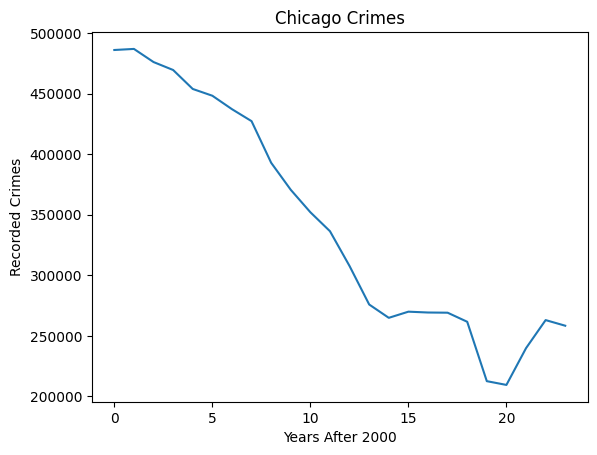

In [137]:
plt.plot(prior_years['Crimes']);
plt.xlabel('Years After 2000');
plt.ylabel('Recorded Crimes');
plt.title('Chicago Crimes');

## EXTRA CREDIT:

#### Use a query that joins two tables.


#### Make a model to see if you can predict something


#### Come up with something else cool to do with your data
